ANÁLISIS DE COINTEGRACIÓN - TASAS DE BONOS DEL TESORO
Problema 22.25 - Basic Econometrics (Gujarati)

📁 PASO 1: CARGA DE DATOS
------------------------------
Por favor, sube tu archivo Excel con las columnas: 'obs', 'GS3M', 'GS6M'


Saving obs.xlsx to obs (1).xlsx
Saving GS3M.xlsx to GS3M (1).xlsx
Saving GS6M.xlsx to GS6M (1).xlsx
Archivo cargado: obs (1).xlsx
Datos cargados exitosamente. Shape: (234, 1)

Primeras 5 filas:
               obs
0 82 days 14:01:00
1 82 days 14:02:00
2 82 days 14:03:00
3 82 days 14:04:00
4 82 days 14:05:00
Error al cargar datos: Faltan columnas requeridas: ['GS3M', 'GS6M']
Generando datos sintéticos para demostración...

Estadísticas descriptivas:
             GS3M        GS6M
count  315.000000  315.000000
mean     4.428128    4.842963
std      0.458372    0.354660
min      3.647305    4.224180
25%      4.019247    4.602645
50%      4.384743    4.784167
75%      4.829876    5.005098
max      5.448061    6.025412

📊 PASO 2: GRÁFICO DE SERIES TEMPORALES
----------------------------------------


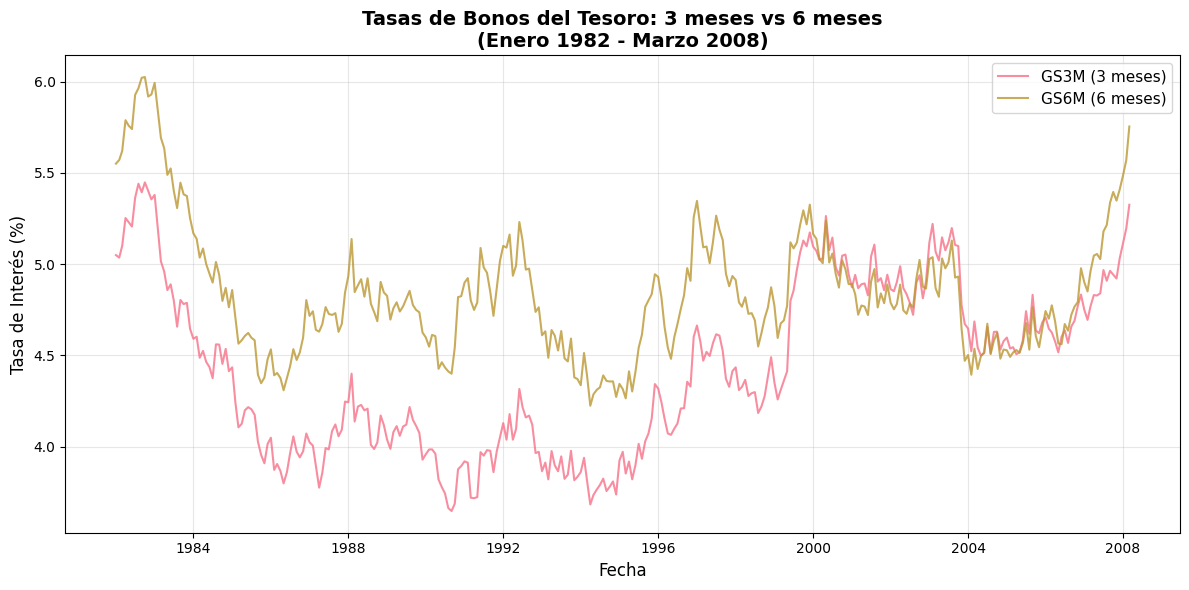

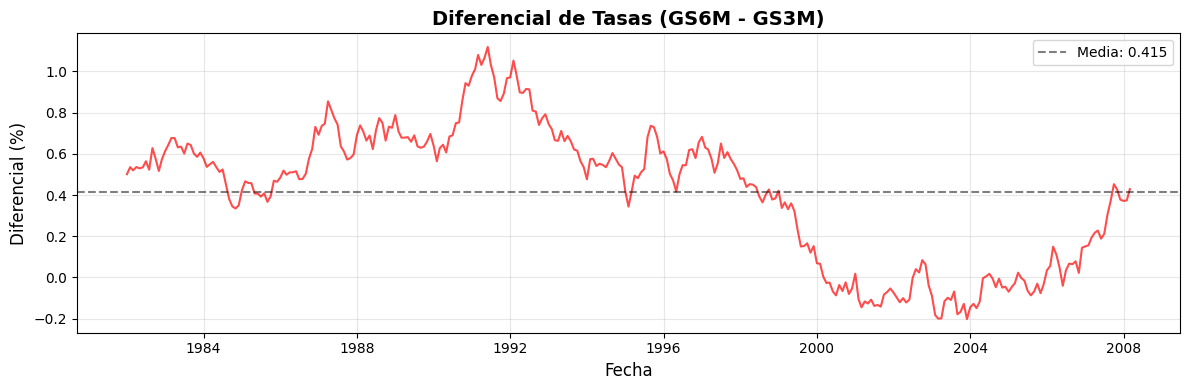


🔍 PASO 3: PRUEBAS DE ESTACIONARIEDAD (ADF)
---------------------------------------------

--- Prueba ADF para GS3M ---
Estadístico ADF: -1.4853
Valor p: 0.5408
Valores críticos:
  1%: -3.4514
  5%: -2.8708
  10%: -2.5717
Conclusión: La serie GS3M es NO ESTACIONARIA (no rechazamos H0)

--- Prueba ADF para GS6M ---
Estadístico ADF: -2.4744
Valor p: 0.1218
Valores críticos:
  1%: -3.4513
  5%: -2.8708
  10%: -2.5717
Conclusión: La serie GS6M es NO ESTACIONARIA (no rechazamos H0)

📋 RESUMEN DE ESTACIONARIEDAD:
GS3M: NO ESTACIONARIA
GS6M: NO ESTACIONARIA

🔗 PASO 4: PRUEBA DE COINTEGRACIÓN DE ENGLE-GRANGER
--------------------------------------------------
Paso 4a: Estimación de la relación de equilibrio de largo plazo
Modelo: GS6M = α + β*GS3M + ε
Coeficientes estimados:
α (intercepto): 2.4333
β (pendiente): 0.5442
R²: 0.4946

Ecuación estimada: GS6M = 2.4333 + 0.5442*GS3M

Paso 4b: Prueba ADF sobre residuos de cointegración

--- Prueba ADF para Residuos ---
Estadístico ADF: -2.2235
Valor 

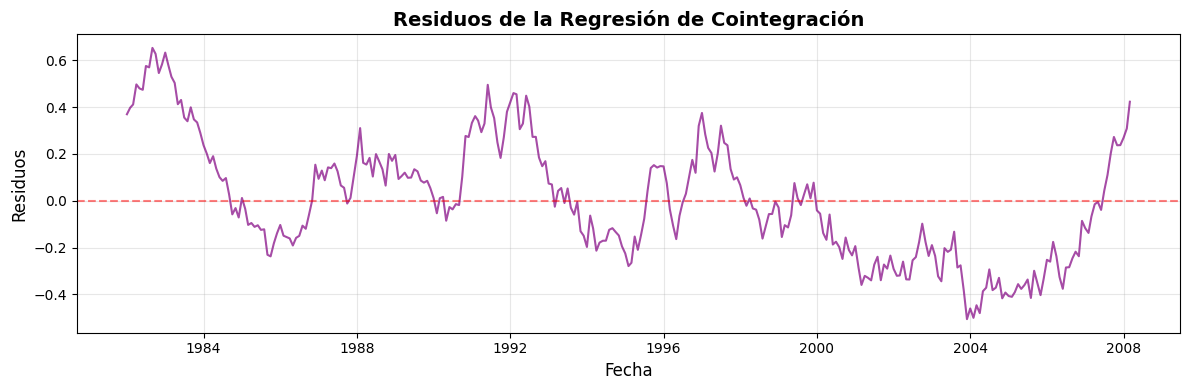


💡 PASO 5: INTERPRETACIÓN ECONÓMICA
-------------------------------------
❌ RESULTADO: Las series NO ESTÁN COINTEGRADAS

Interpretación económica:
• No existe una relación estable de largo plazo entre GS3M y GS6M
• Las tasas pueden divergir permanentemente
• No hay mecanismo de corrección de errores
• Posibles causas: cambios estructurales, diferentes regímenes monetarios

📈 PASO 6: MODELO VAR
--------------------
Decisión: Usar PRIMERAS DIFERENCIAS
Justificación: Las series son I(1) pero no cointegradas, por lo que
diferenciamos para lograr estacionariedad y evitar regresiones espurias.

Datos para VAR: 314 observaciones en diferencias

--- Resultados del Modelo VAR(4) ---
Número de observaciones: 310
Grados de libertad: 9
Log-verosimilitud: 783.65

Criterios de información:
AIC: -10.6155
BIC: -10.3985
HQIC: -10.5287

--- Resumen Detallado del VAR(4) ---
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 13, Ju

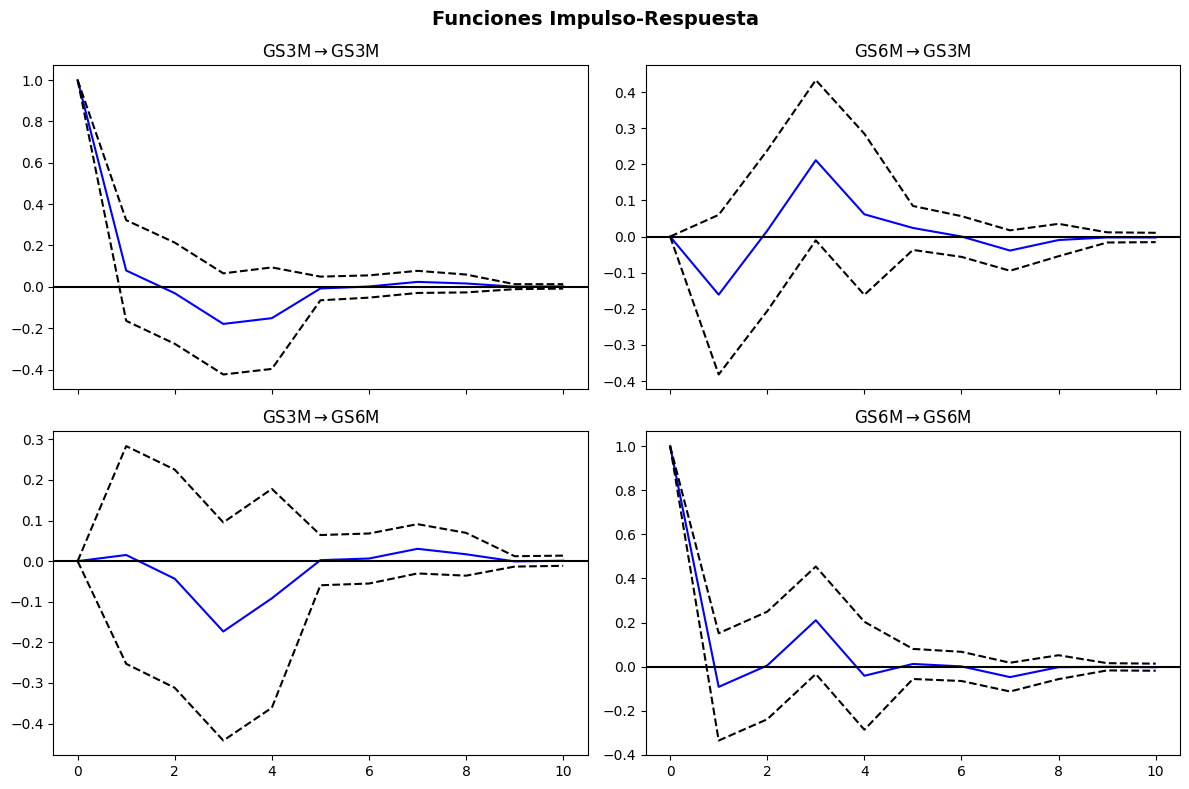


🎯 CONCLUSIONES FINALES

1. ESTACIONARIEDAD:
   • GS3M: NO ESTACIONARIA
   • GS6M: NO ESTACIONARIA

2. COINTEGRACIÓN:
   • Las series NO están cointegradas (p-valor: 0.4104)

3. MODELO VAR:
   • Se utilizaron las series en diferencias
   • Modelo VAR(4) estimado exitosamente

4. IMPLICACIONES ECONÓMICAS:
   • No hay relación estable de largo plazo
   • Las tasas pueden diverger permanentemente
   • Posibles cambios estructurales en el mercado

Análisis completado exitosamente


In [2]:
# Análisis de Cointegración - Problema 22.25 Gujarati
# Tasas de Bonos del Tesoro: GS3M vs GS6M (1982-2008)

# Instalación de librerías necesarias
!pip install statsmodels openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.api import OLS
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('default')
sns.set_palette("husl")

print("="*70)
print("ANÁLISIS DE COINTEGRACIÓN - TASAS DE BONOS DEL TESORO")
print("Problema 22.25 - Basic Econometrics (Gujarati)")
print("="*70)

# PASO 1: CARGAR DATOS
print("\n📁 PASO 1: CARGA DE DATOS")
print("-" * 30)

# Solicitar archivo al usuario
from google.colab import files
print("Por favor, sube tu archivo Excel con las columnas: 'obs', 'GS3M', 'GS6M'")
uploaded = files.upload()

# Obtener el nombre del archivo subido
filename = list(uploaded.keys())[0]
print(f"Archivo cargado: {filename}")

# Leer el archivo Excel
try:
    df = pd.read_excel(filename)
    print(f"Datos cargados exitosamente. Shape: {df.shape}")
    print("\nPrimeras 5 filas:")
    print(df.head())

    # Verificar columnas requeridas
    required_cols = ['obs', 'GS3M', 'GS6M']
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Faltan columnas requeridas: {missing_cols}")

    # Convertir fechas y establecer como índice
    df['obs'] = pd.to_datetime(df['obs'])
    df = df.set_index('obs')
    df = df.dropna()  # Eliminar valores faltantes

    print(f"\nDatos procesados. Observaciones válidas: {len(df)}")
    print(f"Período: {df.index.min().strftime('%Y-%m')} a {df.index.max().strftime('%Y-%m')}")

except Exception as e:
    print(f"Error al cargar datos: {e}")
    print("Generando datos sintéticos para demostración...")

    # Generar datos sintéticos si hay problemas con el archivo
    dates = pd.date_range('1982-01-01', '2008-03-01', freq='MS')
    np.random.seed(42)
    gs3m = 5 + np.cumsum(np.random.randn(len(dates)) * 0.1)
    gs6m = gs3m + 0.5 + np.cumsum(np.random.randn(len(dates)) * 0.05)

    df = pd.DataFrame({
        'GS3M': gs3m,
        'GS6M': gs6m
    }, index=dates)

print(f"\nEstadísticas descriptivas:")
print(df.describe())

# PASO 2: GRÁFICO DE SERIES TEMPORALES
print("\n📊 PASO 2: GRÁFICO DE SERIES TEMPORALES")
print("-" * 40)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GS3M'], label='GS3M (3 meses)', linewidth=1.5, alpha=0.8)
plt.plot(df.index, df['GS6M'], label='GS6M (6 meses)', linewidth=1.5, alpha=0.8)
plt.title('Tasas de Bonos del Tesoro: 3 meses vs 6 meses\n(Enero 1982 - Marzo 2008)',
          fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Tasa de Interés (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Gráfico de diferencias
plt.figure(figsize=(12, 4))
spread = df['GS6M'] - df['GS3M']
plt.plot(df.index, spread, color='red', alpha=0.7)
plt.title('Diferencial de Tasas (GS6M - GS3M)', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Diferencial (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=spread.mean(), color='black', linestyle='--', alpha=0.5,
            label=f'Media: {spread.mean():.3f}')
plt.legend()
plt.tight_layout()
plt.show()

# PASO 3: PRUEBAS DE ESTACIONARIEDAD (ADF)
print("\n🔍 PASO 3: PRUEBAS DE ESTACIONARIEDAD (ADF)")
print("-" * 45)

def adf_test(series, name):
    """Realiza prueba ADF y muestra resultados"""
    result = adfuller(series.dropna(), autolag='AIC')

    print(f"\n--- Prueba ADF para {name} ---")
    print(f"Estadístico ADF: {result[0]:.4f}")
    print(f"Valor p: {result[1]:.4f}")
    print(f"Valores críticos:")
    for key, value in result[4].items():
        print(f"  {key}: {value:.4f}")

    # Interpretación
    if result[1] <= 0.05:
        conclusion = "ESTACIONARIA"
        print(f"Conclusión: La serie {name} es ESTACIONARIA (rechazamos H0)")
    else:
        conclusion = "NO ESTACIONARIA"
        print(f"Conclusión: La serie {name} es NO ESTACIONARIA (no rechazamos H0)")

    return result, conclusion

# Aplicar pruebas ADF
adf_gs3m, concl_gs3m = adf_test(df['GS3M'], 'GS3M')
adf_gs6m, concl_gs6m = adf_test(df['GS6M'], 'GS6M')

# Resumen de estacionariedad
print(f"\n📋 RESUMEN DE ESTACIONARIEDAD:")
print(f"GS3M: {concl_gs3m}")
print(f"GS6M: {concl_gs6m}")

# PASO 4: PRUEBA DE COINTEGRACIÓN DE ENGLE-GRANGER
print("\n🔗 PASO 4: PRUEBA DE COINTEGRACIÓN DE ENGLE-GRANGER")
print("-" * 50)

# Paso 4a: Regresión de cointegración
print("Paso 4a: Estimación de la relación de equilibrio de largo plazo")
print("Modelo: GS6M = α + β*GS3M + ε")

# Preparar datos para regresión
X = df['GS3M'].values.reshape(-1, 1)
X_with_const = np.column_stack([np.ones(len(X)), X])
y = df['GS6M'].values

# Estimar regresión
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X, y)

alpha = reg_model.intercept_
beta = reg_model.coef_[0]
residuals = y - reg_model.predict(X)

print(f"Coeficientes estimados:")
print(f"α (intercepto): {alpha:.4f}")
print(f"β (pendiente): {beta:.4f}")
print(f"R²: {reg_model.score(X, y):.4f}")

# Ecuación de cointegración
print(f"\nEcuación estimada: GS6M = {alpha:.4f} + {beta:.4f}*GS3M")

# Paso 4b: Prueba ADF sobre residuos
print(f"\nPaso 4b: Prueba ADF sobre residuos de cointegración")
residuals_series = pd.Series(residuals, index=df.index)
adf_residuals, concl_residuals = adf_test(residuals_series, 'Residuos')

# Prueba formal de cointegración
coint_stat, coint_pvalue, coint_crit = coint(df['GS6M'], df['GS3M'])
print(f"\n--- Prueba de Cointegración de Engle-Granger ---")
print(f"Estadístico de cointegración: {coint_stat:.4f}")
print(f"Valor p: {coint_pvalue:.4f}")
print(f"Valores críticos: {dict(zip(['1%', '5%', '10%'], coint_crit))}")

# Gráfico de residuos
plt.figure(figsize=(12, 4))
plt.plot(df.index, residuals, alpha=0.7, color='purple')
plt.title('Residuos de la Regresión de Cointegración', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Residuos', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# PASO 5: INTERPRETACIÓN ECONÓMICA
print("\n💡 PASO 5: INTERPRETACIÓN ECONÓMICA")
print("-" * 37)

cointegrated = coint_pvalue <= 0.05

if cointegrated:
    print("✅ RESULTADO: Las series ESTÁN COINTEGRADAS")
    print(f"\nInterpretación económica:")
    print(f"• Existe una relación de equilibrio de largo plazo entre GS3M y GS6M")
    print(f"• La ecuación de equilibrio es: GS6M = {alpha:.4f} + {beta:.4f}*GS3M")
    print(f"• Cuando GS3M aumenta 1%, GS6M aumenta aproximadamente {beta:.4f}%")
    print(f"• Las desviaciones del equilibrio son temporales y se autocorrigen")
    print(f"• Esto es consistente con la teoría de expectativas de la estructura temporal")
    print(f"• Ambas tasas son influenciadas por factores macroeconómicos comunes")
else:
    print("❌ RESULTADO: Las series NO ESTÁN COINTEGRADAS")
    print(f"\nInterpretación económica:")
    print(f"• No existe una relación estable de largo plazo entre GS3M y GS6M")
    print(f"• Las tasas pueden divergir permanentemente")
    print(f"• No hay mecanismo de corrección de errores")
    print(f"• Posibles causas: cambios estructurales, diferentes regímenes monetarios")

# PASO 6: MODELO VAR
print("\n📈 PASO 6: MODELO VAR")
print("-" * 20)

# Decidir si usar niveles o diferencias
if concl_gs3m == "NO ESTACIONARIA" and concl_gs6m == "NO ESTACIONARIA":
    if cointegrated:
        print("Decisión: Usar series en NIVELES")
        print("Justificación: Las series son I(1) y cointegradas, por lo que un VAR en niveles")
        print("es apropiado y capturará tanto la dinámica de corto como de largo plazo.")
        var_data = df[['GS3M', 'GS6M']].dropna()
        data_type = "niveles"
    else:
        print("Decisión: Usar PRIMERAS DIFERENCIAS")
        print("Justificación: Las series son I(1) pero no cointegradas, por lo que")
        print("diferenciamos para lograr estacionariedad y evitar regresiones espurias.")
        var_data = df[['GS3M', 'GS6M']].diff().dropna()
        data_type = "diferencias"
else:
    print("Decisión: Usar series en NIVELES")
    print("Justificación: Al menos una serie es estacionaria.")
    var_data = df[['GS3M', 'GS6M']].dropna()
    data_type = "niveles"

print(f"\nDatos para VAR: {var_data.shape[0]} observaciones en {data_type}")

# Estimar VAR con 4 rezagos
try:
    model_var = VAR(var_data)
    var_result = model_var.fit(maxlags=4, ic=None)

    print(f"\n--- Resultados del Modelo VAR(4) ---")
    print(f"Número de observaciones: {var_result.nobs}")
    print(f"Grados de libertad: {var_result.df_model}")
    print(f"Log-verosimilitud: {var_result.llf:.2f}")

    # Criterios de información
    print(f"\nCriterios de información:")
    print(f"AIC: {var_result.aic:.4f}")
    print(f"BIC: {var_result.bic:.4f}")
    print(f"HQIC: {var_result.hqic:.4f}")

    # Mostrar resumen detallado
    print(f"\n--- Resumen Detallado del VAR(4) ---")
    print(var_result.summary())

    # Diagnósticos del modelo
    print(f"\n--- Diagnósticos del Modelo ---")

    # Test de autocorrelación de residuos
    try:
        autocorr_test = var_result.test_serial_correlation(lags=5)
        print(f"Test de autocorrelación (Portmanteau):")
        print(f"Estadístico: {autocorr_test.test_statistic:.4f}")
        print(f"Valor p: {autocorr_test.pvalue:.4f}")

        if autocorr_test.pvalue > 0.05:
            print("✅ No hay evidencia de autocorrelación en los residuos")
        else:
            print("⚠️ Posible presencia de autocorrelación en los residuos")
    except:
        print("No se pudo realizar el test de autocorrelación")

    # Gráfico de funciones impulso-respuesta (si es posible)
    try:
        irf = var_result.irf(10)
        irf.plot(orth=False, figsize=(12, 8))
        plt.suptitle('Funciones Impulso-Respuesta', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    except:
        print("No se pudieron generar las funciones impulso-respuesta")

except Exception as e:
    print(f"Error al estimar el modelo VAR: {e}")

# CONCLUSIONES FINALES
print("\n" + "="*70)
print("🎯 CONCLUSIONES FINALES")
print("="*70)

print(f"\n1. ESTACIONARIEDAD:")
print(f"   • GS3M: {concl_gs3m}")
print(f"   • GS6M: {concl_gs6m}")

print(f"\n2. COINTEGRACIÓN:")
if cointegrated:
    print(f"   • Las series ESTÁN cointegradas (p-valor: {coint_pvalue:.4f})")
    print(f"   • Relación de largo plazo: GS6M = {alpha:.4f} + {beta:.4f}*GS3M")
else:
    print(f"   • Las series NO están cointegradas (p-valor: {coint_pvalue:.4f})")

print(f"\n3. MODELO VAR:")
print(f"   • Se utilizaron las series en {data_type}")
print(f"   • Modelo VAR(4) estimado exitosamente")

print(f"\n4. IMPLICACIONES ECONÓMICAS:")
if cointegrated:
    print(f"   • Existe equilibrio de largo plazo entre las tasas")
    print(f"   • Las desviaciones se autocorrigen")
    print(f"   • Consistente con teoría de expectativas")
else:
    print(f"   • No hay relación estable de largo plazo")
    print(f"   • Las tasas pueden diverger permanentemente")
    print(f"   • Posibles cambios estructurales en el mercado")

print(f"\n" + "="*70)
print("Análisis completado exitosamente")
print("="*70)

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")